# Ensemble Techniques And Its Types-4

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Check for all duplicates:
df[df.duplicated(keep =False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
# Drop Duplicates:

df.drop_duplicates(inplace=True)
df.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.shape

(302, 14)

In [8]:
df['target'].value_counts(normalize = True)*100

1    54.304636
0    45.695364
Name: target, dtype: float64

#### Observation: It shows the number of Heart Risk patients are more than Normal patients hence its an imbalanced feature.

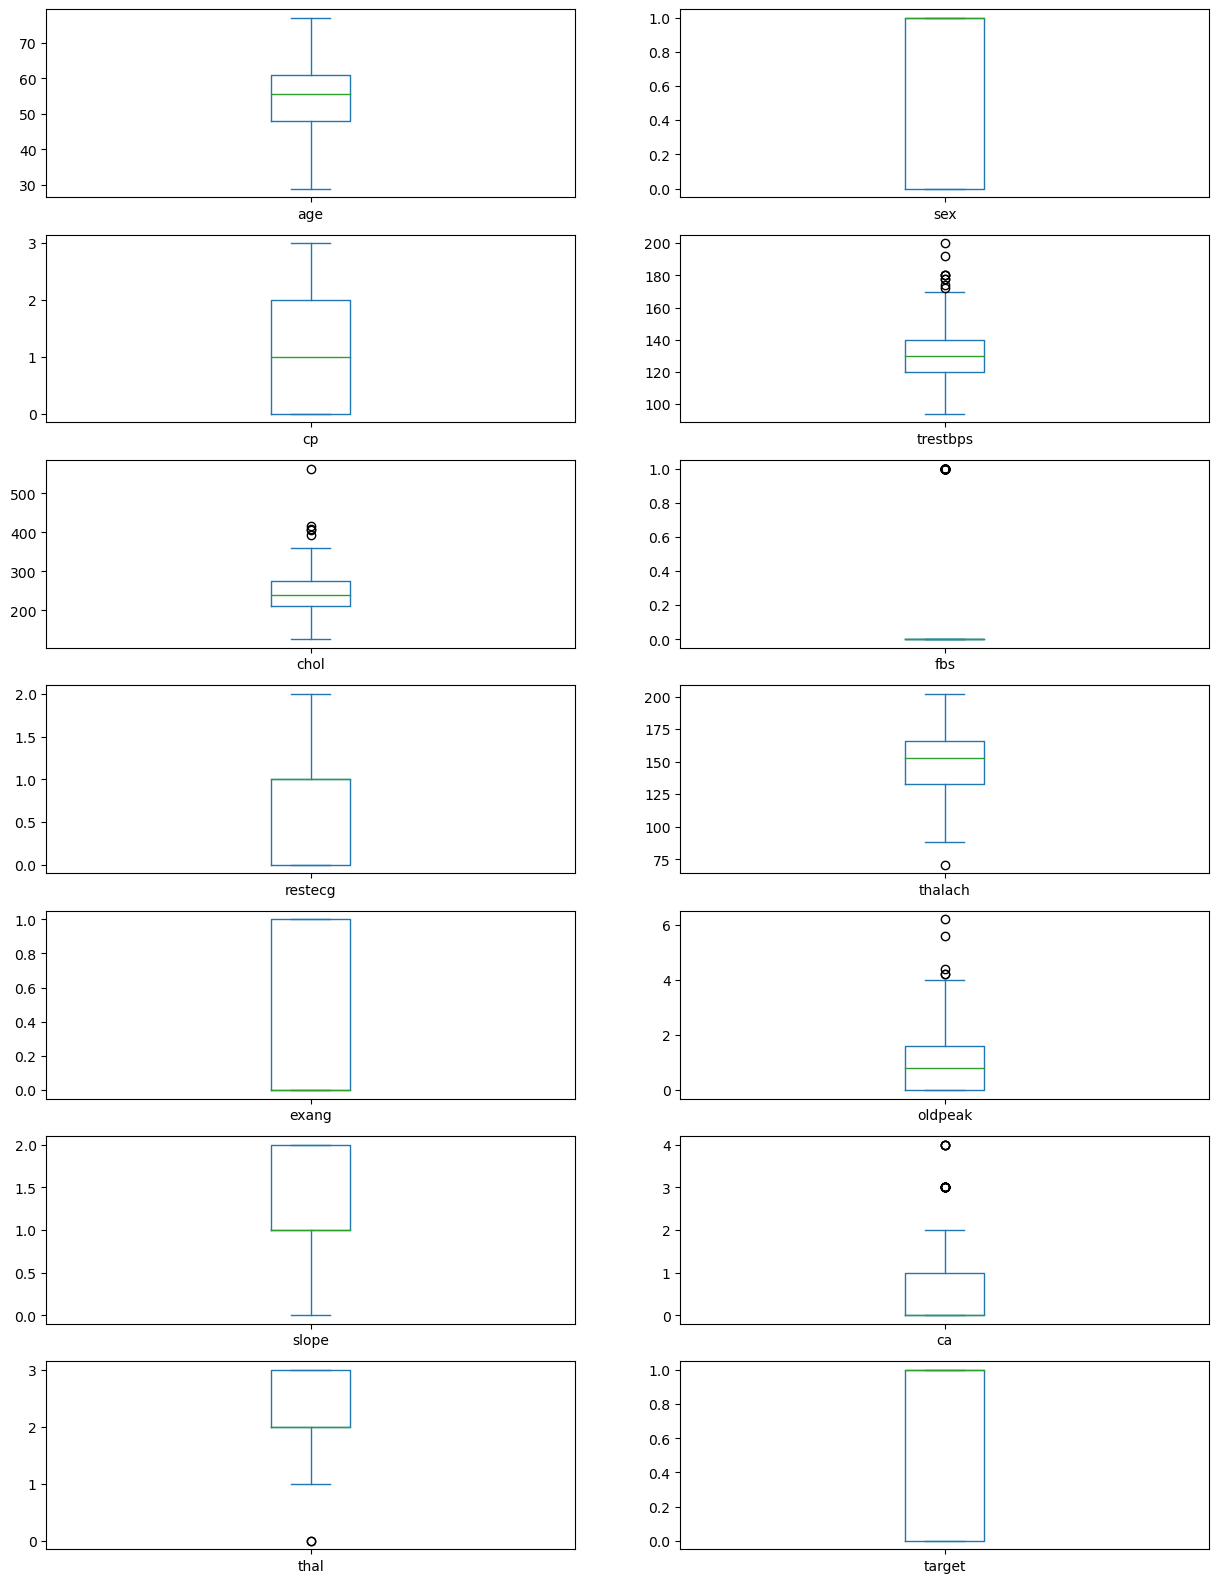

In [13]:
# Checking for Outliers:

df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))
plt.show()

### It seems 'trestbps' ,'chol','oldpeak' and 'ca' have few outliers

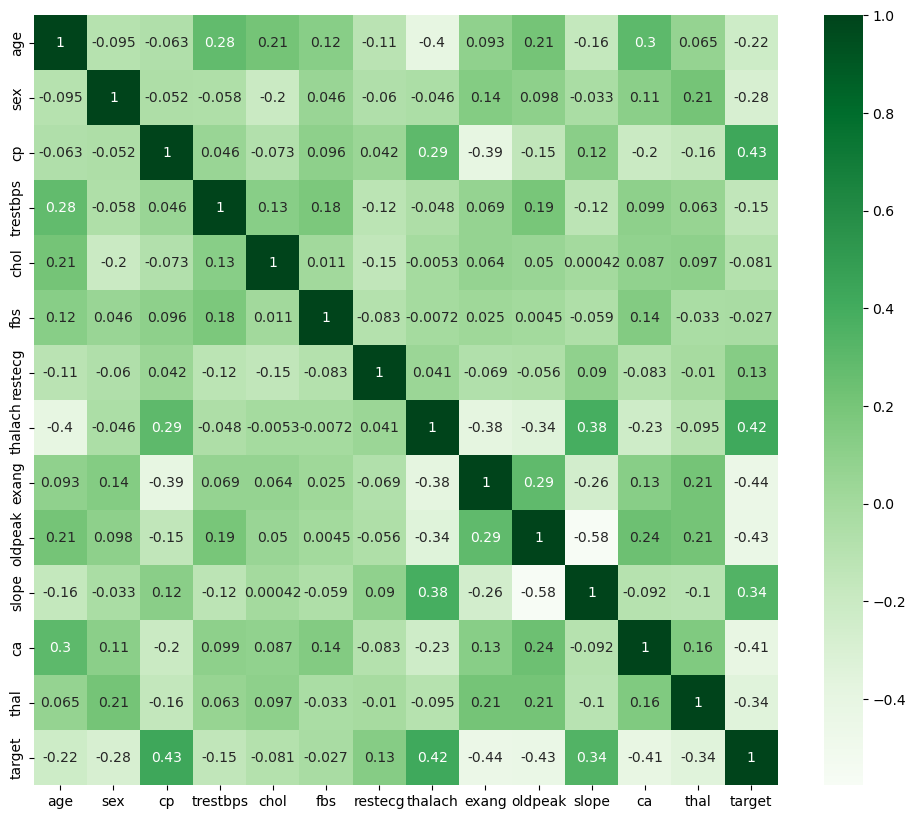

In [13]:
# Lets visualize correlation among each features via heatmap:

plt.figure(figsize=(12,10))

p = sns.heatmap(df.corr(), annot=True,cmap ="Greens")

### From the above heatmap, we can observe that all the features are weakly correlated, so that it removes multicollinearity out of equation.

## Model Building:

In [43]:
# Splitting Test and Train Data:

from sklearn.model_selection import train_test_split

X = df.drop(columns = ['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)
X_train.shape, X_test.shape

((211, 13), (91, 13))

In [44]:
# Standardizing the data:

from sklearn.preprocessing import StandardScaler

##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [45]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)


In [46]:
X_train_scaled

array([[ 0.16525994, -1.37492216,  0.1126103 , ..., -0.67189277,
        -0.73228795, -0.48373104],
       [ 1.03159158,  0.7273139 , -0.87742192, ..., -0.67189277,
         0.27104165,  1.18950257],
       [ 1.13988303, -1.37492216,  1.10264252, ...,  0.93912285,
         0.27104165, -0.48373104],
       ...,
       [ 0.81500867, -1.37492216, -0.87742192, ..., -0.67189277,
         2.27770084, -0.48373104],
       [-0.37619733, -1.37492216,  1.10264252, ...,  0.93912285,
        -0.73228795, -0.48373104],
       [-1.1342375 ,  0.7273139 , -0.87742192, ..., -2.2829084 ,
        -0.73228795, -2.15696466]])

In [47]:
X_test_scaled

array([[-0.26790587,  0.7273139 , -0.87742192, ...,  0.93912285,
         2.27770084,  1.18950257],
       [-1.45911187, -1.37492216,  1.10264252, ...,  0.93912285,
        -0.73228795, -0.48373104],
       [-1.35082041, -1.37492216, -0.87742192, ..., -0.67189277,
        -0.73228795, -0.48373104],
       ...,
       [ 0.2735514 ,  0.7273139 , -0.87742192, ..., -0.67189277,
         0.27104165, -2.15696466],
       [-0.70107169,  0.7273139 ,  0.1126103 , ..., -0.67189277,
        -0.73228795, -0.48373104],
       [ 0.70671721,  0.7273139 ,  1.10264252, ..., -0.67189277,
        -0.73228795, -0.48373104]])

In [48]:
# Random Forest Classifier:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10)


In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0])

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification Report:\n',classification_report(y_test,y_pred))
print('------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------------')
print('Test Accuracy for Random Forest Classifier is',accuracy_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73        41
           1       0.76      0.84      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

------------------------------------------------
Confusion Matrix:
 [[28 13]
 [ 8 42]]
------------------------------------------------
Test Accuracy for Random Forest Classifier is 0.7692307692307693


In [27]:
# Checking Important Features:

In [53]:
importances = model.feature_importances_

In [54]:
importances

array([0.08472568, 0.03356762, 0.14011207, 0.06282857, 0.07243435,
       0.01231668, 0.02089659, 0.14858081, 0.05888355, 0.09933007,
       0.045181  , 0.13289093, 0.08825207])

In [55]:
features = pd.DataFrame()

In [56]:
features['Feature'] = X.columns
features['Score'] = importances

In [57]:
features.sort_values(by = 'Score', ascending = False, inplace = True)

In [58]:
features

,Feature,Score
7,thalach,0.148581
2,cp,0.140112
11,ca,0.132891
9,oldpeak,0.099330
12,thal,0.088252
0,age,0.084726
4,chol,0.072434
3,trestbps,0.062829
8,exang,0.058884
10,slope,0.045181


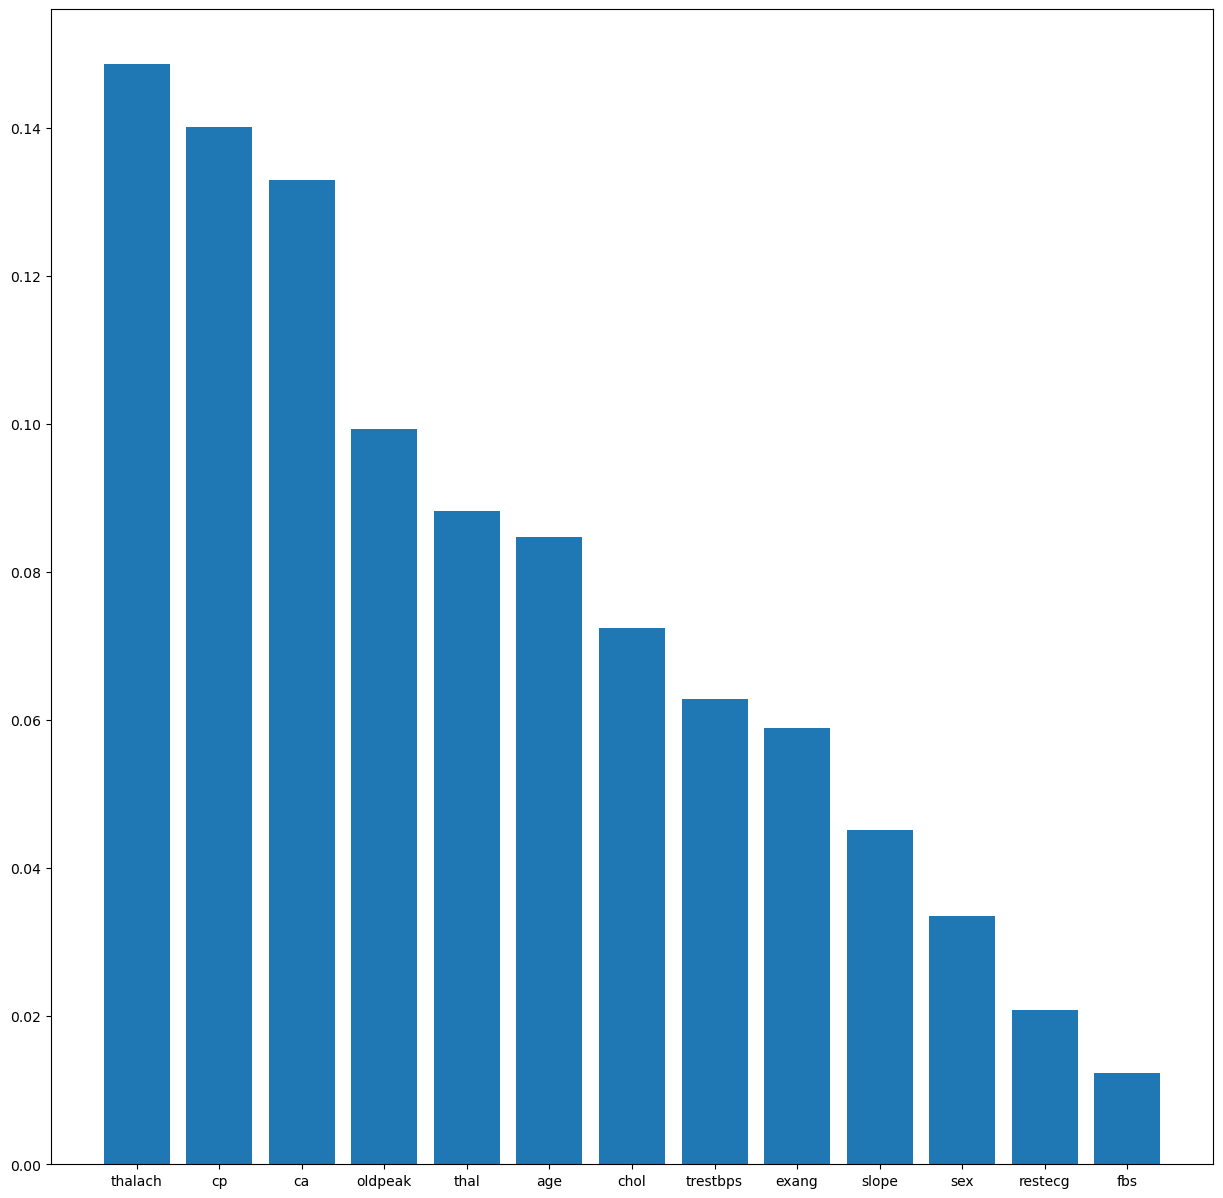

In [59]:
plt.figure(figsize=(15,15))
plt.bar(features['Feature'],features['Score'])
plt.show()

In [60]:
# Top 5 important features are:

features.head()

,Feature,Score
7,thalach,0.148581
2,cp,0.140112
11,ca,0.132891
9,oldpeak,0.099330
12,thal,0.088252


In [61]:
# Hyperparameter tunning:

parameter={
 'n_estimators':[10,50,80,100],
    'criterion':['gini', 'entropy', 'log_loss'],
  'min_samples_split':[2,4,6,8,10],
  'max_depth':[1,2,3,4,5,6,8,10],
  'max_features':['sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 4]
}

In [77]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator = model,param_distributions = parameter,
               n_iter = 100, cv = 5 ,verbose = 3, scoring='accuracy')

In [78]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.837 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.881 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.833 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.881 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=80;, score=0.860 total time=   0.2s
[CV 2/5] END criterion=gin

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 8, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 50, 80, 100]},
                   scoring='accuracy', verbose=3)

In [79]:
random_cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'gini'}

In [80]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=6,min_samples_leaf=1, max_features='sqrt',
                               criterion='gini')


In [81]:
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=6, n_estimators=50)

In [82]:
y_pred1 = model1.predict(X_test)

In [83]:
y_pred1

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0])

In [84]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification Report:\n',classification_report(y_test,y_pred1))
print('------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred1))
print('------------------------------------------------')
print('Test Accuracy for Random Forest Classifier after Tuning is',accuracy_score(y_test,y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

------------------------------------------------
Confusion Matrix:
 [[31 10]
 [ 9 41]]
------------------------------------------------
Test Accuracy for Random Forest Classifier after Tuning is 0.7912087912087912


## The test accuracy before Hyper Parameter Tunning was 0.7692307692307693
## The test accuracy after Hyper Parameter Tunning is 0.7912087912087912